# NumPy Basics: Arrays and Vectorized Computation

Numerical Python 的简称，是Python科学计算的基础包,广泛应用于数学运算，矩阵计算以及数值分析等。 

NumPy的主要对象是**同类型**元素的多维数组。

其所有的元素都是一种类型、通过一个正整数元组索引的元素表格。
本节的内容包括array数据的：
+ 生成
+ 选取
+ 数据处理
+ 运算等

Remark:
> 所有元素都是同一个类型

+ 导入numpy, 设置数据显示的格式，设置在notebook中显示图形

In [2]:
from numpy.random import randn  #导出：产生随机数的函数
""" Return a sample (or samples) from the "standard normal" distribution.

If positive int_like arguments are provided, randn generates an array of shape (d0, d1, ..., dn), filled with random floats sampled from a univariate "normal" (Gaussian) distribution of mean 0 and variance 1. A single float randomly sampled from the distribution is returned if no argument is provided. """
import numpy as np

# 设置NumPy对象的显示的格式,
np.set_printoptions(precision=4, suppress=True) #四位小数的显示

%matplotlib inline 
#图形得是内嵌式的显示方式

> %matplotlib inline #???这个是什么意思？？

In [3]:
a=np.array([34.23534,0.1**30])
a


array([34.2353,  0.    ])

输出：
> array([34.2353,  0.    ])
因为0.1**30 太小了，直接为0了

##  NumPy 多维数值

在NumPy中维度(dimensions)叫做轴(axes)。

+   [1, 2, 3] 是1$\times$3的数组 

+ [[ 1., 0., 0.], [ 0., 1., 2.]]是2$\times$3的数组， 它有两个维度，第一个维度长度为2,第二个维度长度为3. 



In [102]:
a=[1,2,3]
b=[[1,]]

+ 下面的例子抽取一个$2\times 3$的数组，并进行计算。 randn函数从标准正态分布抽取随机数。 
> rand 随机， n Normal 正态

In [103]:
data = randn(2, 3) 
#data
data

array([[ 0.1405,  1.0691, -0.9508],
       [-1.9612, -0.1777,  0.8472]])

In [104]:
print(data * 10,end="\n\n")#每个变量都去乘10
print(data + data)#对应变量相加

[[  1.4048  10.6907  -9.5075]
 [-19.612   -1.7772   8.4724]]

[[ 0.281   2.1381 -1.9015]
 [-3.9224 -0.3554  1.6945]]


In [105]:
data.shape 

(2, 3)

In [106]:
data.dtype

dtype('float64')

### 产生数组变量

+ min和max之间的等差数列，np.arange,np.linspace,
  + 前者根据每一步的差(step)产生数列，不包含max，
  + 后者根据数列的元素个数(num)产生数列，包含max.

In [107]:
print(np.arange(15),end="\n\n")#不包含max，步长默认default为1
print(np.arange(2,15),end="\n\n")
print(np.arange(2,15,2),end="\n\n")
print(np.arange(2,15,1.5),end="\n\n")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

[ 2  3  4  5  6  7  8  9 10 11 12 13 14]

[ 2  4  6  8 10 12 14]

[ 2.   3.5  5.   6.5  8.   9.5 11.  12.5 14. ]



In [108]:
print(np.linspace(0,1,11),end="\n\n")#指定个数
print(np.linspace(0,1,11,endpoint=False),end="\n\n")#可以确定是否包含最后一个
print(np.linspace(0,1,12),end="\n\n")

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

[0.     0.0909 0.1818 0.2727 0.3636 0.4545 0.5455 0.6364 0.7273 0.8182
 0.9091]

[0.     0.0909 0.1818 0.2727 0.3636 0.4545 0.5455 0.6364 0.7273 0.8182
 0.9091 1.    ]



+ 用list产生

In [109]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)#转化为numpy支持的array类型
print(arr1)
print(arr1.shape)

[6.  7.5 8.  0.  1. ]
(5,)


In [110]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [111]:
arr2.shape

(2, 4)

In [112]:
# reshape可以改变维度
arr2.reshape((1, 8)).reshape(4,2)# reshape((1, 8))和reshape(1, 8)都可以

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

+ 一些常用的矩阵和向量

In [113]:
np.zeros(10,dtype="int")#产生全零的array
#np.empty(10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [114]:
np.ones((2,3))#产生全部时1的array

array([[1., 1., 1.],
       [1., 1., 1.]])

In [115]:
np.identity(2)
np.eye(2,3)

array([[1., 0., 0.],
       [0., 1., 0.]])

### 多维数组的类型 

+ np.array的数据类型可以指定，如果没有指定，会自动推断

In [116]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr = np.array([1, 2, 3, 4, 5])
arr1.dtype,arr2.dtype,arr.dtype

(dtype('float64'), dtype('int32'), dtype('int32'))

+ 转换数据类型

In [117]:
# 整数转换为浮点 astype
float_arr = arr.astype(np.float64)

float_arr.dtype,float_arr

(dtype('float64'), array([1., 2., 3., 4., 5.]))

In [118]:
# 浮点转换为整数
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [119]:
# 字符转浮点，实际上，python程序读取文件的时候都读入的时字符串
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=str)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

###  数组和标量的运算
数组的+，-，*,/为对应位置的点对点运算

In [120]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [121]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [122]:
1 / arr

array([[1.    , 0.5   , 0.3333],
       [0.25  , 0.2   , 0.1667]])

In [123]:
arr ** 0.5

array([[1.    , 1.4142, 1.7321],
       [2.    , 2.2361, 2.4495]])

###  索引和切片

In [124]:
arr = np.arange(10)
print(np.arange(10))
arr[5]

[0 1 2 3 4 5 6 7 8 9]


5

In [125]:
arr[5:8]#5,6,7 切片，不包含8

array([5, 6, 7])

+ 5:8表示[5,6,7]

+  而list,array等python对象位置索引从0开始的，其实是引用第6，7，8个元素。

In [126]:
arr[5:8] = 12  #切片传到的地址
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

+ 切片传地址; 
> 注意这里和list有区别,一般数列list的切片拷贝生成新的对象

In [127]:
arr=np.arange(10)
arr_slice = arr[5:8] 
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,     5, 12345,     7,     8,
           9])

In [128]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [129]:
arr_slice=6400
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

+ list 切片拷贝生成新的对象

In [130]:
a_list=list(range(10))
list_slice = a_list[5:8]
list_slice[1] = 12345
a_list 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [131]:
a=[1,2,3,[1,2]]
b=a[3]
b[1]=1000
# 但这里传地址
#嵌套的list这里传输了地址！！！

In [132]:
a[3] is b #可以通过is来测试

True

In [133]:
import copy
c = copy.deepcopy(a)###深度拷贝！
print( a is c, a == c)

False True


In [134]:
a

[1, 2, 3, [1, 1000]]

+ 二维数组的引用和切片

In [135]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d)
"几种不同的引用方式:",arr2d[2],arr2d[:][1],arr2d[:,1],arr2d[0][2],arr2d[0, 2]
#比较 arr2d[:][1] 和 arr2d[:,1]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


('几种不同的引用方式:', array([7, 8, 9]), array([4, 5, 6]), array([2, 5, 8]), 3, 3)

In [136]:
# 二维数组切片也传地址
b=arr2d[2]
b1=arr2d[0][:2]
b2=arr2d[0][:1]

b1[:]=1000
b2[:]=999
b[:]=30
arr2d

array([[ 999, 1000,    3],
       [   4,    5,    6],
       [  30,   30,   30]])

+ 3维数组的引用和切片

+ 三层嵌套[],每层一个维度

In [137]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [138]:
arr3d.shape

(2, 2, 3)

In [139]:
"第一维：",arr3d[0],"第二维：",arr3d[0][0],"第三维：",arr3d[0][0][0]

('第一维：',
 array([[1, 2, 3],
        [4, 5, 6]]),
 '第二维：',
 array([1, 2, 3]),
 '第三维：',
 1)

+ 数组拷贝
> 要生成新的对象(传递数值)，而不是传递地址，需要用到copy函数

In [140]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d)
old_values=arr2d.copy()
old_values 

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [141]:
arr2d[0][:] =999
print(arr2d)
print("copy:",old_values)

[[999 999 999]
 [  4   5   6]
 [  7   8   9]]
copy: [[1 2 3]
 [4 5 6]
 [7 8 9]]


+ 利用切片索引

In [142]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [143]:
arr2d
arr2d[:2]

array([[999, 999, 999],
       [  4,   5,   6]])

In [144]:
#arr2d[1, :2]
arr2d

array([[999, 999, 999],
       [  4,   5,   6],
       [  7,   8,   9]])

In [145]:
arr2d[:2, 1:] = 0
arr2d

array([[999,   0,   0],
       [  4,   0,   0],
       [  7,   8,   9]])

###  利用布尔值索引

In [4]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = randn(7, 4)
print(names,end="\n\n")
data

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']



array([[-0.5149, -0.4598,  1.1409,  1.4695],
       [-0.092 ,  0.1057, -0.1716,  2.2388],
       [ 0.4893,  1.3228,  0.3409,  0.8712],
       [ 0.5189, -1.1036,  1.7334,  0.6594],
       [-0.3215,  0.7259, -0.7214,  2.623 ],
       [-0.4679, -0.7818, -0.7429, -0.3755],
       [-1.4682,  2.2913, -0.7857, -1.578 ]])

In [147]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [148]:
data[names == 'Bob']

array([[ 0.0828,  1.3796, -0.081 ,  1.4352],
       [-0.4467, -1.2982,  0.4204, -0.8192]])

In [149]:
data[names == 'Bob', 2:]

array([[-0.081 ,  1.4352],
       [ 0.4204, -0.8192]])

In [150]:
data[names == 'Bob', 3]

array([ 1.4352, -0.8192])

In [151]:
names != 'Bob'
data[names != 'Bob']

array([[-0.672 ,  0.0474,  0.1055,  1.0468],
       [-0.7298,  0.8721,  0.5034,  1.7086],
       [-0.4261,  0.7107, -0.1085,  0.1546],
       [ 1.5522, -0.3756, -1.5304,  1.2393],
       [-1.3808,  0.7902,  0.1443,  0.4114]])

In [152]:
mask = (names == 'Bob') | (names == 'Will')
mask 

array([ True, False,  True,  True,  True, False, False])

In [153]:
data[mask]

array([[ 0.0828,  1.3796, -0.081 ,  1.4352],
       [-0.7298,  0.8721,  0.5034,  1.7086],
       [-0.4467, -1.2982,  0.4204, -0.8192],
       [-0.4261,  0.7107, -0.1085,  0.1546]])

In [154]:
data

array([[ 0.0828,  1.3796, -0.081 ,  1.4352],
       [-0.672 ,  0.0474,  0.1055,  1.0468],
       [-0.7298,  0.8721,  0.5034,  1.7086],
       [-0.4467, -1.2982,  0.4204, -0.8192],
       [-0.4261,  0.7107, -0.1085,  0.1546],
       [ 1.5522, -0.3756, -1.5304,  1.2393],
       [-1.3808,  0.7902,  0.1443,  0.4114]])

In [155]:
data<0

array([[False, False,  True, False],
       [ True, False, False, False],
       [ True, False, False, False],
       [ True,  True, False,  True],
       [ True, False,  True, False],
       [False,  True,  True, False],
       [ True, False, False, False]])

In [156]:
data[data < 0] = 0
#data
data

array([[0.0828, 1.3796, 0.    , 1.4352],
       [0.    , 0.0474, 0.1055, 1.0468],
       [0.    , 0.8721, 0.5034, 1.7086],
       [0.    , 0.    , 0.4204, 0.    ],
       [0.    , 0.7107, 0.    , 0.1546],
       [1.5522, 0.    , 0.    , 1.2393],
       [0.    , 0.7902, 0.1443, 0.4114]])

In [157]:
data[names != 'Joe'] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.0474, 0.1055, 1.0468],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [1.5522, 0.    , 0.    , 1.2393],
       [0.    , 0.7902, 0.1443, 0.4114]])

###   花式索引

利用整数数组进行索引，该引用拷贝数据。

In [158]:
np.empty((8, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [159]:
a=np.empty([2, 2])
a[1,1]

0.0

In [160]:
?np.empty

Docstring:
empty(shape, dtype=float, order='C', *, like=None)

Return a new array of given shape and type, without initializing entries.

Parameters
----------
shape : int or tuple of int
    Shape of the empty array, e.g., ``(2, 3)`` or ``2``.
dtype : data-type, optional
    Desired output data-type for the array, e.g, `numpy.int8`. Default is
    `numpy.float64`.
order : {'C', 'F'}, optional, default: 'C'
    Whether to store multi-dimensional data in row-major
    (C-style) or column-major (Fortran-style) order in
    memory.
like : array_like, optional
    Reference object to allow the creation of arrays which are not
    NumPy arrays. If an array-like passed in as ``like`` supports
    the ``__array_function__`` protocol, the result will be defined
    by it. In this case, it ensures the creation of an array object
    compatible with that passed in via this argument.

    .. versionadded:: 1.20.0

Returns
-------
out : ndarray
    Array of uninitialized (arbitrary) data of the gi

In [161]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr 

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [162]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [163]:
arr[[-3, -5, -7]]
#- 表示倒序

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [164]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [165]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [166]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

###  转置

In [167]:
arr = np.arange(15).reshape((3, 5)) 
arr
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [168]:
arr = np.random.randn(6, 3)
np.dot(arr.T, arr)

array([[ 9.4539, -5.0524, -1.3898],
       [-5.0524,  4.9327, -0.781 ],
       [-1.3898, -0.781 ,  4.0668]])

In [169]:
arr =np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

##  通用函数，快速的元素级数组函数
 

In [170]:
arr = np.arange(10)
np.sqrt(arr)
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

In [171]:
x = randn(8)
y = randn(8)
print(x)
print(y)
np.maximum(x, y) #  x,y生成一个2维元组，对应位置取x,y的最大值

[-0.3567  0.1203  0.5997 -0.8844  0.8242 -0.9034  1.3897 -0.7339]
[ 1.0582  0.3236 -3.9238 -0.4088  0.1014 -1.3909 -0.0512 -0.0376]


array([ 1.0582,  0.3236,  0.5997, -0.4088,  0.8242, -0.9034,  1.3897,
       -0.0376])

In [172]:
arr = randn(7) * 5
print(arr)
np.modf(arr)

[  2.8263  -1.1423  -6.1414  -0.275   -2.5093 -15.7598  -3.4083]


(array([ 0.8263, -0.1423, -0.1414, -0.275 , -0.5093, -0.7598, -0.4083]),
 array([  2.,  -1.,  -6.,  -0.,  -2., -15.,  -3.]))

## 使用数组处理数据

In [173]:
#meshgrid生成网格
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)

ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [174]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [175]:
from matplotlib.pyplot import imshow, title

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

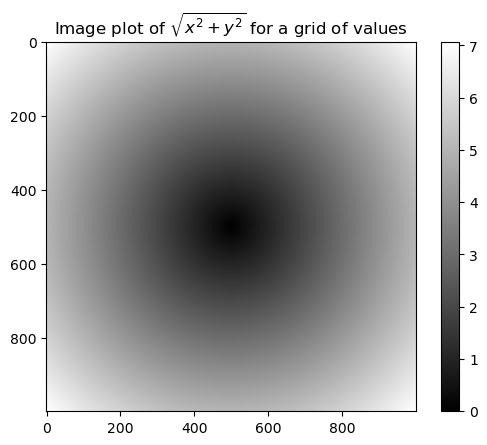

In [176]:
import matplotlib.pyplot as plt
z = np.sqrt(xs ** 2 + ys ** 2)
z
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

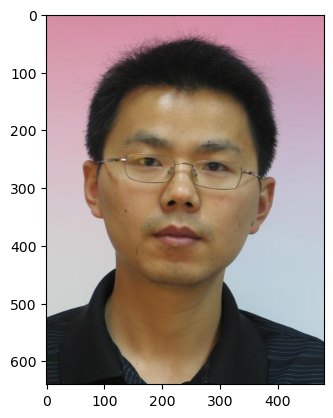

In [177]:
#import skimage
from skimage import io, color, filters
import matplotlib.pyplot as plt

#p=io.imread("E:\\teaching\\2017datafin\\notebook\\data\\new sheet_002.jpg")
image=io.imread("https://www.math.pku.edu.cn/images/content/2018-06/20180627113001257500.png")
plt.imshow(image)

In [178]:
image[0,0,:]

array([212, 140, 160], dtype=uint8)

In [179]:
image.shape

(640, 480, 3)

### 条件表达式,np.where

In [180]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [181]:
result = np.where(cond, xarr, yarr)  ## if cond return xarr else return yarr
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [182]:
arr = randn(4, 4)
arr
np.where(arr > 0, 2, -2)
np.where(arr > 0, 2, arr) # set only positive values to 2#

array([[ 2.    , -0.1023,  2.    , -0.2216],
       [ 2.    , -0.8227, -2.2312, -0.8932],
       [-0.6861,  2.    , -1.1318, -0.2342],
       [-0.5472, -0.4791, -0.1971, -0.2218]])

###  数学及统计函数

包括函数 sum, mean, std,var, min, max, argmin,argmax,cumsum,cumprod

In [199]:
arr = np.random.randn(5, 4) # normally-distributed data
print(arr)
arr.mean()
np.mean(arr)
arr.sum()

[[ 0.0659  2.155   0.9485 -1.1262]
 [-1.8579  0.8554 -0.9378 -1.6316]
 [ 0.382  -0.4234  1.6353  1.4534]
 [ 1.226  -1.102  -0.6417 -0.8292]
 [-0.239   0.2571 -0.5056 -0.1857]]


-0.5015662468021679

In [200]:
print(arr)
print(arr.mean())#所有元素求和
print(arr.mean(axis=0)) #累计求和可以按照列或者行来操作
arr.sum(0)

[[ 0.0659  2.155   0.9485 -1.1262]
 [-1.8579  0.8554 -0.9378 -1.6316]
 [ 0.382  -0.4234  1.6353  1.4534]
 [ 1.226  -1.102  -0.6417 -0.8292]
 [-0.239   0.2571 -0.5056 -0.1857]]
-0.025078312340108395
[-0.0846  0.3484  0.0997 -0.4639]


array([-0.423 ,  1.7421,  0.4987, -2.3193])

In [185]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr.cumsum(1)
arr.cumprod(1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### Methods for boolean arrays

In [201]:
arr = randn(100)
(arr > 0).sum() # Number of positive values
#计算大于零的个数的数目

50

In [204]:
bools = np.array([False, False, True, False])
print(bools.any()) #只要有一个是真的就是真的
print(bools.all()) #全部是真的才是真的

True
False


### Sorting

In [207]:
arr = randn(8)
print(arr)
x=arr.sort()
print(arr)
print(x)#sort的返回值是空的

[ 0.4512 -0.902  -0.4297 -0.8189 -0.6011 -0.3784  2.7077 -0.0808]
[-0.902  -0.8189 -0.6011 -0.4297 -0.3784 -0.0808  0.4512  2.7077]
None


In [210]:
arr = randn(5, 3)
print(arr)
arr.sort(0) ## 0每列排序，1，每行
#可以设置按行或者按列排序，但是是每个向量单独排序
arr

[[-0.4516  0.1596  1.2801]
 [-0.3185 -0.8079  0.2032]
 [-1.3337 -0.6053 -1.2666]
 [-1.9699  0.6307  0.8653]
 [-0.1646  1.4296 -1.092 ]]


array([[-1.9699, -0.8079, -1.2666],
       [-1.3337, -0.6053, -1.092 ],
       [-0.4516,  0.1596,  0.2032],
       [-0.3185,  0.6307,  0.8653],
       [-0.1646,  1.4296,  1.2801]])

In [190]:
arr = randn(5, 3)
print(arr)
arr.sort(1) ## 0每列排序，1，每行排序
arr


[[ 0.1553  0.6944 -1.7045]
 [ 0.3191  0.0205  1.1038]
 [ 1.5849 -0.2264 -1.3451]
 [ 2.0065 -0.15   -1.4356]
 [-1.1691 -0.9638  0.9995]]


array([[-1.7045,  0.1553,  0.6944],
       [ 0.0205,  0.3191,  1.1038],
       [-1.3451, -0.2264,  1.5849],
       [-1.4356, -0.15  ,  2.0065],
       [-1.1691, -0.9638,  0.9995]])

### Unique and other set logic

函数包括：unique(x),intersect1d(x,y),union1d(x,y),in1d(x,y),setdiff1d(x,y),setxor1d(x,y)

In [191]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

['Bob' 'Joe' 'Will']


array([1, 2, 3, 4])

In [192]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [193]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## 数组的输入和输出

In [213]:
arr = np.arange(10)
np.save('some_array', arr)#把arr存储到some_array文件中

In [214]:
a=np.load('some_array.npy')
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [196]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [197]:
#np.savez,多个数组
arch = np.load('D:\\teaching\\金融数据分析datafin\\data\\array_archive.npz')
arch['b']

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\teaching\\金融数据分析datafin\\data\\array_archive.npz'

### Saving and loading text files

In [ ]:
!type data\array_ex.txt

In [ ]:
arr = np.loadtxt('data/array_ex.txt', delimiter=',')
arr

## Linear algebra

> 矩阵运算

函数包括：diag,dot,trace,det,eig,inv,pinv,qr,svd,solve,lstsq

In [218]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x.shape, y.shape,end='\n\n')
print(x)
print(y)
x.dot(y)  # equivalently np.dot(x, y), 真正的矩阵乘法 

(2, 3) (3, 2)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]


array([[ 28.,  64.],
       [ 67., 181.]])

In [222]:
t=np.ones(3)
print(t,end='\n\n')
print(x.shape,t.shape,end='\n\n')
np.dot(x, np.ones(3))

[1. 1. 1.]

(2, 3) (3,)



array([ 6., 15.])

numpy.linalg中有更多矩阵函数。

In [223]:
from numpy.linalg import inv, qr#求逆矩阵，QR分解
X = randn(5, 5)
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
r

array([[-5.7715,  3.219 ,  3.4191,  6.0973,  1.0298],
       [ 0.    , -6.7504,  2.1538,  0.0558,  5.4036],
       [ 0.    ,  0.    , -3.5403, -0.048 , -7.9725],
       [ 0.    ,  0.    ,  0.    , -2.0745,  2.7559],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  1.499 ]])

## Random number generation

> 随机数产生

seed,permutation,shuffle,rand,randit,randn,vinomial,normal,beta,chisquare,gamma,uniform等

> seed 设定随机种子，这样每次产生的随机数是一样的，具有可复现性

In [229]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 0.7217,  0.0356,  0.2626, -0.1379],
       [-0.2078, -1.3384,  0.3594, -0.6423],
       [-0.0222, -0.5491,  0.2185, -1.4517],
       [ 0.4367,  1.6626,  1.402 ,  0.0604]])

## 其它常用函数
+ np.repeat
+ np.digitize
+ np.random.randint,np.random.choice,np.random.binomial,
+ np.polyfit
+ np.plyval
+ np.nan
+ np.argmax
+ np.squeeze
+ np.histogram


## 作业

1.  给定一个二维数组，每行是一个向量。找出所有不同的行。
比如： 

```x = np.array([[1., 2., 3.], [4., 5., 6.],[1., 2., 3.], [4., 5., 6.]]),则
x[:2]，即x的第0,1行，array([[ 1.,  2.,  3.],[ 4.,  5.,  6.]])就是要找到行。
```

备注：请不要直接调用numpy.unique

2.  a).产生正态数据数据向量 Z,长度为T， 建立一个二维数组，使其第一行为 (Z[0],Z[1],Z[2])，然后每一行都后移一位 （因此最后一行为 (Z[T-3],Z[T-2],Z[T-1] );b). 计算每列数据的样本均值，方差，各列之间的协方差。
 
3. a). 随机生成一个1000行50列二维数组，每个元素等概率取值0，1，2，并将该数组按第1列递增和第2列递减对每行排序，即先按第一列递增排序，然后在第一列每组中， 按第二列递减排序。 b). 编一个函数sortbycols(data,cols,descending)，实现行排序。给定参数 data是二维数值，cols是数或list,给出需要排序的列，descending是布尔值或布尔向量，如果是一个布尔值，则所有列都按该顺序排，如果descending是和cols等长的list，则各列按descending给定的顺序排。
4.  熟悉学习numpy中的现金流函数, np.pv,np.fv,np.nper,np.pmt,np.rate, 然后编制一个函数，计算给定现金流(array)，利率(array),任意时刻(t)的现金价值。

 
 
